In [30]:
##tools
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper


In [31]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [32]:
arxiv.invoke("what is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [33]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [34]:
from dotenv import load_dotenv
load_dotenv()

import os 
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [35]:
## Tavily Seach Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily=TavilySearchResults()

In [36]:
tavily.invoke("Provide me the recent AI news")

[{'title': 'Artificial Intelligence News -- ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': 'Robot See, Robot Do: System Learns After Watching How-to Videos · Brain-Inspired AI Breakthrough: Making Computers See More Like Humans · AI Tool Grounded in',
  'score': 0.97915},
 {'title': 'Google AI announcements from July - The Keyword',
  'url': 'https://blog.google/technology/ai/google-ai-updates-july-2025/',
  'content': "Here are Google's latest AI updates from July 2025. ... To keep you posted on our progress, we're doing a regular roundup of Google's most recent AI news.",
  'score': 0.97899},
 {'title': 'AI News & Artificial Intelligence | TechCrunch',
  'url': 'https://techcrunch.com/category/artificial-intelligence/',
  'content': 'News coverage on artificial intelligence and machine learning tech, the companies building them, and the ethical issues AI raises today.',
  'score': 0.97473},
 {'title': 'Artificial inte

In [37]:
## Combine all these tools in the list 

tools=[arxiv,wiki,tavily]


In [38]:
## Initialize the LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen/qwen3-32b")

In [39]:
llm.invoke("What is AI")

AIMessage(content='<think>\nOkay, the user asked "What is AI," and I need to address this. First, AI stands for Artificial Intelligence, which refers to machines or software simulating human intelligence to perform tasks like reasoning, learning, problem-solving, perception, and language understanding. The key here is that AI can be categorized into two main types: narrow AI, which focuses on specific tasks like voice assistants or recommendation systems, and general AI, which is still in the research phase and aims for human-like comprehensive intelligence.\n\nNext, I should explain the core technologies of AI. Machine learning is crucial because it enables systems to improve performance through data learning. Deep learning, a subset of machine learning, uses neural networks to process large datasets, such as image or speech recognition. Natural language processing (NLP) helps machines understand and generate human language. Computer vision allows machines to interpret visual informat

In [40]:
llm_with_tools=llm.bind_tools(tools=tools)

In [41]:
## Execute this call 
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent news on AI. I need to figure out which tool to use here. Let me look at the available tools. There\'s arxiv, wikipedia, and tavily_search_results_json. \n\nArxiv is for academic papers, so maybe not the best choice for general news. Wikipedia provides general information but might not have the latest updates. The user mentioned "recent news," which suggests they want the latest updates from reliable sources. \n\nTavily_search_results_json is described as a search engine optimized for comprehensive, accurate, and trusted results, especially for current events. That sounds like the right tool here. I should use that to get the most up-to-date news on AI.\n\nSo, I\'ll call the tavily_search_results_json function with the query "recent news on AI" to fetch the latest information.\n', 'tool_calls': [{'id': '8rv8zydav', 'function': {'arguments': '{"query":"recent news on AI"}', 'name': 'tavily_

In [42]:
## Execute this call 
llm_with_tools.invoke("What is the latest research on Quantum Computing?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the latest research on Quantum Computing. I need to figure out which tool to use here. The available tools are arxiv, wikipedia, and tavily_search.\n\nArxiv is great for academic papers, which would give the latest research. Wikipedia might be too general and might not cover very recent studies. Tavily is for current events, but quantum computing research might be more academic. So I should use arxiv to get the latest papers. The query parameter should be "Quantum Computing" to search for recent publications. Let me check if the parameters are correct. The function requires a query string. Yeah, that\'s set. I\'ll call arxiv with that query.\n', 'tool_calls': [{'id': 'gam004pxy', 'function': {'arguments': '{"query":"Quantum Computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 169, 'prompt_tokens': 355, 'total_tokens': 524, 'completion_t

In [43]:
## Execute this call 
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is machine learning?" I need to provide a clear and concise answer. Let me think about the best way to approach this.\n\nFirst, I should check if I have any functions that can help retrieve information. Looking at the tools provided, there\'s Wikipedia, arXiv, and Tavily Search. Since machine learning is a general topic, Wikipedia would be a good source for a foundational definition. The arXiv is more for research papers, which might be too technical here. Tavily is for current events, but machine learning is a well-established field, so Wikipedia is probably best.\n\nI should call the Wikipedia function with the query "machine learning". That should give the user a reliable overview. Let me make sure the parameters are correct. The function requires a "query" parameter, which I\'ll set to "machine learning". \n\nOnce I get the Wikipedia result, I can summarize the key points: machine learning

In [44]:
## Workflow 

In [45]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage   ## human msg or ai msg
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages ## reducers in langgraph


In [46]:
class State(TypedDict):
  messages:Annotated[list[AnyMessage],add_messages]
  

In [47]:
## Entire Chatbot with langgraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


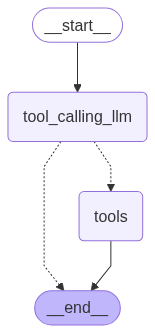

In [53]:
## node definition
def tool_calling_llm(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

## Build the graph
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))


## edges 
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",
                 # if the latest message (result) from assistant is a tool call-> tools_condition routes to tools
                 # if the latest message (result) from assistant is not a tool call-> tools_condition routes to END 
                 tools_condition,
                 )
builder.add_edge("tools",END)

graph=builder.compile()

#view 
display(Image(graph.get_graph().draw_mermaid_png()))


In [55]:
messages=graph.invoke({"messages":"1706.03762"}) # research paper no.
for m in messages["messages"]:
  m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (3egjzy0js)
 Call ID: 3egjzy0js
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [56]:
messages=graph.invoke({"messages":"Hi My name is Isha"}) # research paper no.
for m in messages["messages"]:
  m.pretty_print()

================================ Human Message =================================

Hi My name is Isha
================================== Ai Message ==================================

Hello, Isha! How can I assist you today?


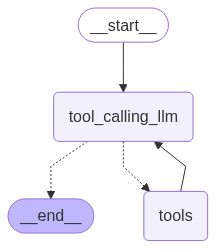

In [57]:
## node definition
def tool_calling_llm(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

## Build the graph
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))


## edges 
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",
                 # if the latest message (result) from assistant is a tool call-> tools_condition routes to tools
                 # if the latest message (result) from assistant is not a tool call-> tools_condition routes to END 
                 tools_condition,
                 )
builder.add_edge("tools","tool_calling_llm")

graph=builder.compile()

#view 
display(Image(graph.get_graph().draw_mermaid_png()))


In [61]:
messages=graph.invoke({"messages":"What is the recent AI news and please tell me the recent research paper on Quantum Computing"})
for m in messages["messages"]:
  m.pretty_print()

================================ Human Message =================================

What is the recent AI news and please tell me the recent research paper on Quantum Computing
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (w9evbv8qe)
 Call ID: w9evbv8qe
  Args:
    query: recent AI news 2023
  arxiv (v2kzthjjp)
 Call ID: v2kzthjjp
  Args:
    query: Quantum Computing
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Spectrum's Top AI Stories of 2023", "url": "https://spectrum.ieee.org/ai-news-2023", "content": "All through the spring of 2023, important and credible people freaked out about the possible negative consequences—ranging from somewhat troubling to existentially bad—of ever-improving AI. First came an open letter calling for a pause on the development of advanced models, then a statement about existential risk, the first inter